In [1]:
# importing pandas as pd
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# switches
separateDevices = True
allDevices = True

In [17]:
# array contains all the flowResult files which belongs to this MUD flow
# DUP
all_files = [
             "AwairAirQuality_70886b100fc6.pcap", 
             "LiFXBulb_d073d5018308.pcap", 
             "PixStarPhotoFrame_e076d033bb85.pcap", 
             "RingDoorBell_884aea31669d.pcap",
             "TPLinkCamera_f4f26D9351f1.pcap", 
             "TribySpeaker_18B79E022044.pcap", 
             "AmazonEcho/DUP_CONCATANATED_AmazonEcho_44650d56ccd3", 
             "NestProtect/DUP_CONCATANATED_NestProtect_18b43025bee4",
             "WithingsSleepSensor/DUP_CONCATANATED_WithingsSleepSensor_0024e42028c6"
             ]

In [18]:
filePath = 'flowResults/V4/both/'
fileType = '_flowResult.csv'

In [19]:
# loading all the files as pandas dataframes
all_dfs = []

for filename in all_files:
    df = pd.read_csv("../../../../data/" + filePath + filename + fileType)
    all_dfs.append(df)

#### Checking the number of flows in each device flow result

In [20]:
total = 0
for i in range(len(all_files)):
    print('Number of flows in {0}: {1}'.format(all_files[i], len(all_dfs[i])))
    total += len(df)
print("Total number of flows:", total)

Number of flows in AwairAirQuality_70886b100fc6.pcap: 2153
Number of flows in LiFXBulb_d073d5018308.pcap: 7740
Number of flows in PixStarPhotoFrame_e076d033bb85.pcap: 6239
Number of flows in RingDoorBell_884aea31669d.pcap: 633
Number of flows in TPLinkCamera_f4f26D9351f1.pcap: 10549
Number of flows in TribySpeaker_18B79E022044.pcap: 7953
Number of flows in AmazonEcho/DUP_CONCATANATED_AmazonEcho_44650d56ccd3: 106964
Number of flows in NestProtect/DUP_CONCATANATED_NestProtect_18b43025bee4: 255644
Number of flows in WithingsSleepSensor/DUP_CONCATANATED_WithingsSleepSensor_0024e42028c6: 38899
Total number of flows: 350091


/tmp/ipykernel_80119/2939196777.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = grouped_df_dst.pivot(' dstPort', ' ipProto', 'numOfFlows')
/tmp/ipykernel_80119/2939196777.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = grouped_df_dst.pivot(' dstPort', ' ipProto', 'numOfFlows')
/tmp/ipykernel_80119/2939196777.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = grouped_df_dst.pivot(' dstPort', ' ipProto', 'numOfFlows')
/tmp/ipykernel_80119/2939196777.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = grouped_df_dst.pivot(' dstPort', ' ipProto', 'numOfFlows')
/tmp/ipykernel_80119/2939196777.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = grouped_d

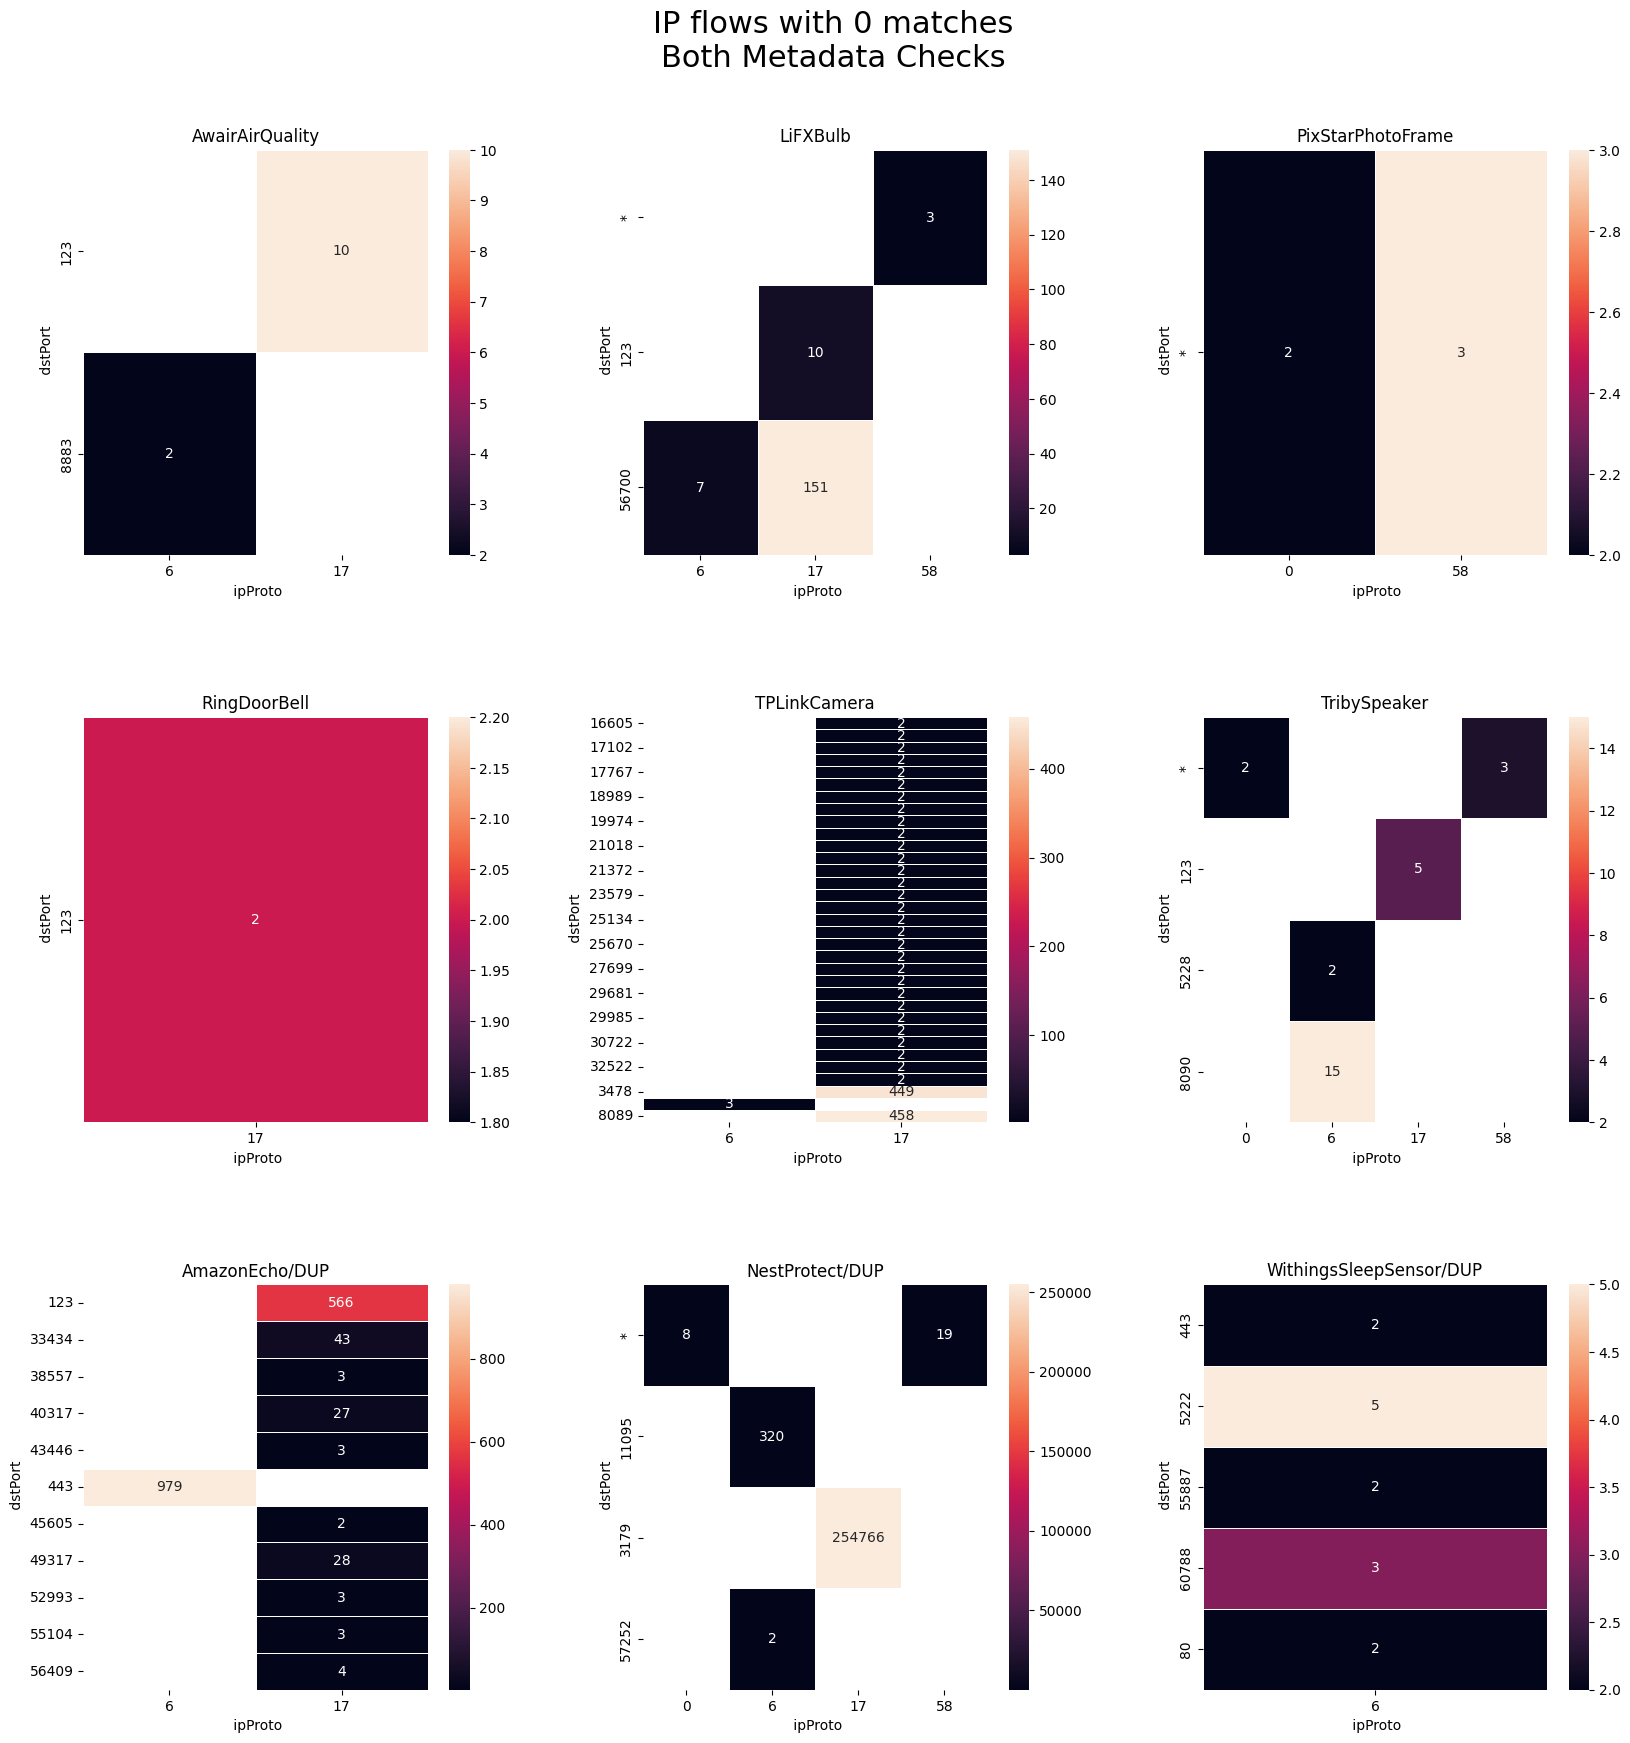

In [21]:
if separateDevices:
    # define subplot grid
    plotRows = math.ceil(len(all_dfs) / 3)
    plotCols = 3


    fig, axs = plt.subplots(nrows=plotRows, ncols=plotCols, figsize=(20, 20))
    plt.subplots_adjust(hspace=.4, wspace=.3)
    fig.suptitle("IP flows with 0 matches\nBoth Metadata Checks", fontsize=22, y=0.95)

    pos = 0
    for df, ax in zip(all_dfs, axs.ravel()):
        
        # Filtering the flows with 0 matches and grouping by (ipProto, dstPort)
        filtered_df = df.loc[df[' protocol'].str.contains('none')]  # filtering the flows with 0 matches

        grouped_df_dst = filtered_df.groupby([' ipProto', ' dstPort'])[' ipProto'].count().reset_index(name='numOfFlows')  
        
        # dropping the rows with a low count
        grouped_df_dst.drop(grouped_df_dst[grouped_df_dst['numOfFlows'] <= 1].index, inplace=True)
        
        heatPIV = grouped_df_dst.pivot(' dstPort', ' ipProto', 'numOfFlows')

        
        sns.heatmap(heatPIV, annot=True, fmt=".0f", linewidths=.5, ax=ax)
        
        ax.set_title(all_files[pos].split("_")[0])
        pos+=1
        # chart formatting

    plt.show()

#### Concatanating all the dataframes to get a single one for the MUD flow

In [22]:
total_df = pd.concat(all_dfs, axis=0, ignore_index=True)
display(total_df.info())
print(total_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436774 entries, 0 to 436773
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   srcMac       0 non-null       float64
 1    dstMac      0 non-null       float64
 2    ethType     436774 non-null  object 
 3    srcIp       436774 non-null  object 
 4    dstIp       436774 non-null  object 
 5    ipProto     436774 non-null  int64  
 6    srcPort     436774 non-null  object 
 7    dstPort     436774 non-null  object 
 8    protocol    436774 non-null  object 
 9    allMatches  178140 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 33.3+ MB


None

Index(['srcMac', ' dstMac', ' ethType', ' srcIp', ' dstIp', ' ipProto',
       ' srcPort', ' dstPort', ' protocol', ' allMatches'],
      dtype='object')


#### Filtering the flows with 0 matches and grouping by (ipProto, dstPort)

/tmp/ipykernel_80119/2486143371.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = grouped_df_dst.pivot(' dstPort', ' ipProto', 'numOfFlows')


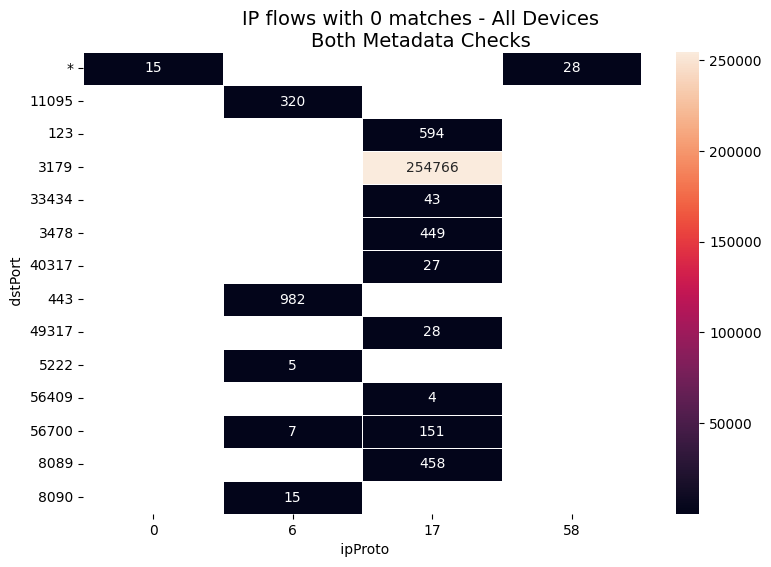

In [23]:
if allDevices:
    
    # Filtering the flows with 0 matches and grouping by (ipProto, dstPort)
    filtered_df = total_df.loc[total_df[' protocol'].str.contains('none')]  # filtering the flows with 0 matches

    grouped_df_dst = filtered_df.groupby([' ipProto', ' dstPort'])[' ipProto'].count().reset_index(name='numOfFlows')  
    # grouped_df_src = filtered_df.groupby([' ipProto', ' srcPort'])[' ipProto'].count().reset_index(name='No. of flows')  

    # dropping the rows with a low count
    grouped_df_dst.drop(grouped_df_dst[grouped_df_dst['numOfFlows'] <= 3].index, inplace=True)

    heatPIV = grouped_df_dst.pivot(' dstPort', ' ipProto', 'numOfFlows')

    # Draw a heatmap with the numeric values in each cell
    f, ax = plt.subplots(figsize=(9, 6))
    f.suptitle("IP flows with 0 matches - All Devices\nBoth Metadata Checks", fontsize=14, y=0.95)
    sns.heatmap(heatPIV, annot=True, fmt=".0f", linewidths=.5, ax=ax)